# Assignment 1



In [37]:
import sys
import shutil
import urllib
import os

import warnings
warnings.filterwarnings("ignore")

import zipfile
from pathlib import Path
import requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Iterable, List, Callable, Dict
from tqdm import tqdm
import random
import numpy as np
import tensorflow as tf
import nltk

seed = 852

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

tf.config.experimental.enable_op_determinism()
# Set environment variable for TensorFlow
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

## Dataset creation

In [38]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_dataset(download_path: Path, url: str):
    response = requests.get(url)
    with open(download_path, 'wb') as f:
        f.write(response.content)

def download_url(download_path: Path, url: str):
    print("Downloading dataset...")
    download_url(url=url, download_path=download_path)
    print("Download complete!")

def extract_dataset(download_path: Path, extract_path: Path):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction completed!")

In [39]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_name = "dependency_treebank"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")

if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_zip_path = dataset_folder.joinpath("dependency_treebank.zip")
dataset_path = dataset_folder.joinpath(dataset_name)

if not dataset_zip_path.exists():
    download_dataset(dataset_zip_path, url)

if not dataset_path.exists():
    extract_dataset(dataset_zip_path, dataset_folder)

Current work directory: d:\università\Magistrale\NLP\Assignement\Assignment1NLP


In [40]:
folder = dataset_folder.joinpath(dataset_name)

In [41]:
#Corpus splitted by sentence
dataframe_rows = []
index = 0
tag_set = set([])
for file_path in folder.glob('*.dp'):
    with file_path.open(mode='r', encoding='utf-8') as text_file:
        index+=1
        sentence =  ''
        tag = []
        lines = text_file.readlines()
        for line in lines:
            line_parts = line.split('\t')
            if len(line_parts) == 1: #case '\n'
                dataframe_row = {
                    "sentence": sentence,
                    "POS": tag,
                    "index": index,
                    "split": 'train' if index <=100 else  'validation' if index<=150 else 'test'
                }
                dataframe_rows.append(dataframe_row)
                sentence =  ''
                tag = []
            else:
                sentence += line_parts[0] + " "
                tag.append(line_parts[1])
                tag_set.add(line_parts[1])
        # Last sentence
        dataframe_row = {
                    "sentence": sentence,
                    "POS": tag,
                    "index": index,
                    "split": 'train' if index <=100 else  'validation' if index<=150 else 'test'
                }
        dataframe_rows.append(dataframe_row)
df = pd.DataFrame(dataframe_rows)

In [42]:
df

,sentence,POS,index,split
0,"Pierre Vinken , 61 years old , will join the b...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ...",1,train
1,"Mr. Vinken is chairman of Elsevier N.V. , the ...","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ...",1,train
2,"Rudolph Agnew , 55 years old and former chairm...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP...",2,train
3,A form of asbestos once used to make Kent ciga...,"[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS...",3,train
4,"The asbestos fiber , crocidolite , is unusuall...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V...",3,train
...,...,...,...,...
3909,They also said that more than a dozen presiden...,"[PRP, RB, VBD, IN, JJR, IN, DT, NN, NNS, VBP, ...",198,test
3910,Sen. Kennedy said in a separate statement that...,"[NNP, NNP, VBD, IN, DT, JJ, NN, IN, PRP, VBZ, ...",198,test
3911,Trinity Industries Inc. said it reached a prel...,"[NNP, NNPS, NNP, VBD, PRP, VBD, DT, JJ, NN, TO...",199,test
3912,Terms were n't disclosed .,"[NNS, VBD, RB, VBN, .]",199,test


In [43]:
from nltk.corpus import treebank
""" Using operations from nltk module to visualise the syntax tree of the Penn Treebank """
nltk.download('treebank')

# Get a parsed sentence from the firs Wall Street Journal article
parsed_sentence = treebank.parsed_sents('wsj_0001.mrg')[0]
print(parsed_sentence)

# Visualise the syntax tree of the parsed sentence
parsed_sentence.draw()

# Remember to close the window to halt this running cell! 

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Mattia\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [44]:
# Distribution of words in sentences
print("Distribution of words: ")
word_counts = df['sentence'].str.split().explode().value_counts()
print(word_counts)
print()

# Distribution of POS tags
print("Distribution of POS tags: ")
print(df['POS'].explode().value_counts())
print()

Distribution of words: 
,         4885
the       4045
.         3828
of        2319
to        2164
          ... 
treats       1
stones       1
kidney       1
laser        1
Train        1
Name: sentence, Length: 11968, dtype: int64

Distribution of POS tags: 
NN       13166
IN        9857
NNP       9410
DT        8165
NNS       6047
JJ        5834
,         4886
.         3874
CD        3546
VBD       3043
RB        2822
VB        2554
CC        2265
TO        2179
VBN       2134
VBZ       2125
PRP       1716
VBG       1460
VBP       1321
MD         927
POS        824
PRP$       766
$          724
``         712
''         694
:          563
WDT        445
JJR        381
NNPS       244
WP         241
RP         216
JJS        182
WRB        178
RBR        136
-RRB-      126
-LRB-      120
EX          88
RBS         35
PDT         27
#           16
WP$         14
LS          13
FW           4
UH           3
SYM          1
Name: POS, dtype: int64



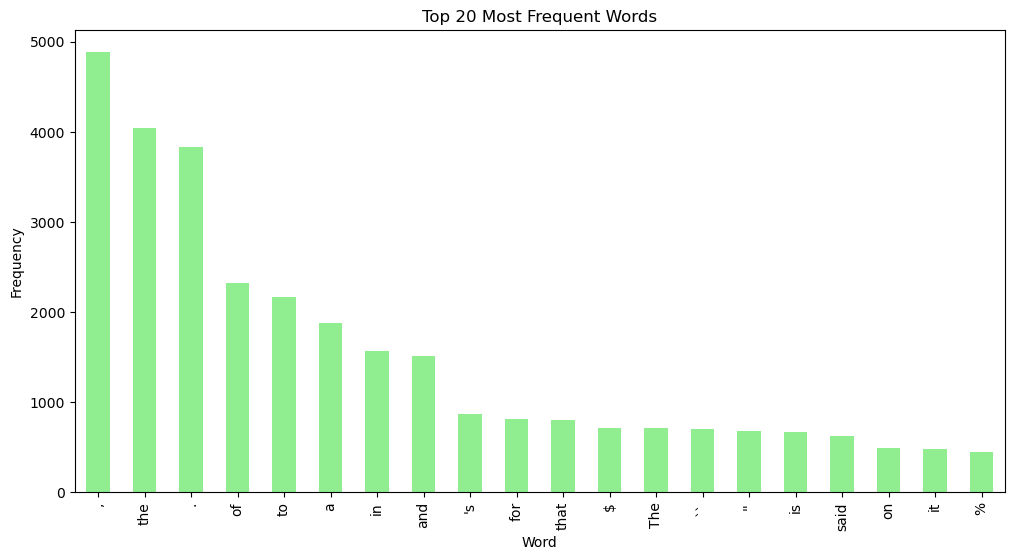

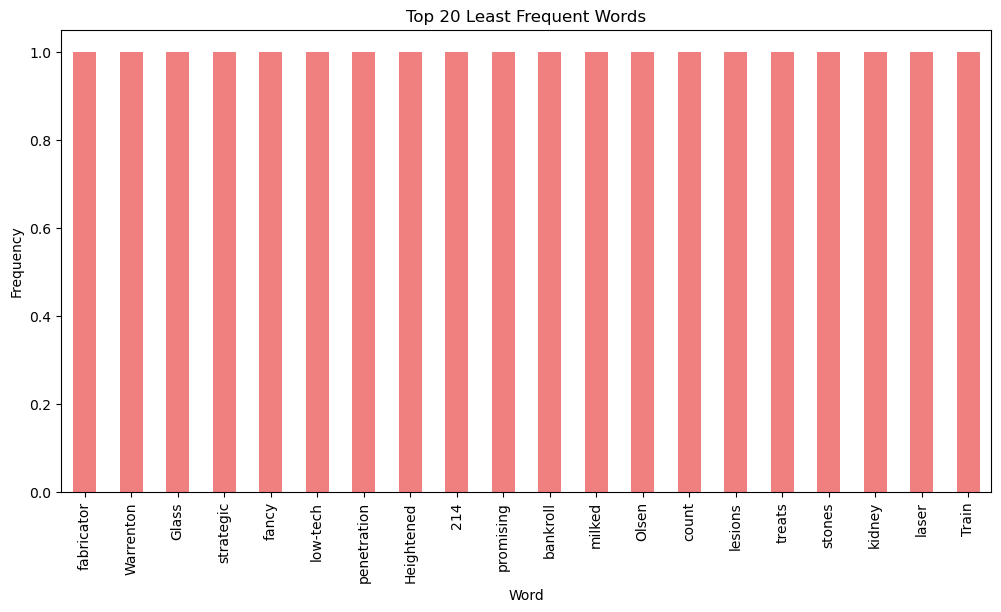

In [45]:
# Plot the 20 most frequent words
plt.figure(figsize=(12, 6))
word_counts.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Plot the 20 least frequent words
plt.figure(figsize=(12, 6))
word_counts.tail(20).plot(kind='bar', color='lightcoral')
plt.title('Top 20 Least Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


Length of longest sentence: 1265
Amount of sentences: 3914


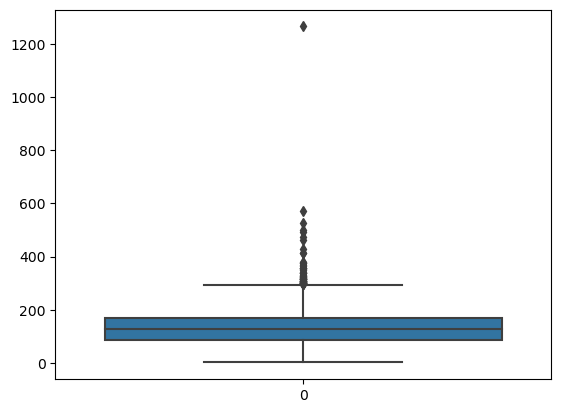

In [46]:
# check length of longest sentence
lengths = [len(seq) for seq in df['sentence']]
print("Length of longest sentence: {}".format(max(lengths)))
print("Amount of sentences: {}".format((len(lengths))))
sns.boxplot(lengths)
plt.show()

In [47]:
#Dictionary for labels
treebank_index_to_tag = {}
treebank_tag_to_index = {}
index = 1
for tag in tag_set:
    treebank_index_to_tag[index] = tag
    treebank_tag_to_index[tag] = index
    index+=1

treebank_index_to_tag[0] = ' '
treebank_tag_to_index[' '] = 0

print(treebank_index_to_tag)
print(treebank_tag_to_index)

{1: 'WP', 2: 'NN', 3: '.', 4: 'WRB', 5: 'FW', 6: 'VBZ', 7: 'RB', 8: 'UH', 9: 'JJR', 10: 'VB', 11: '``', 12: 'TO', 13: 'NNPS', 14: 'PDT', 15: '-LRB-', 16: 'CD', 17: 'JJ', 18: 'NNS', 19: '#', 20: 'EX', 21: 'VBN', 22: 'CC', 23: 'RBS', 24: 'SYM', 25: 'PRP$', 26: 'LS', 27: 'NNP', 28: "''", 29: 'PRP', 30: 'RP', 31: 'RBR', 32: 'VBP', 33: 'WP$', 34: ',', 35: 'WDT', 36: 'POS', 37: 'MD', 38: 'DT', 39: 'JJS', 40: ':', 41: '-RRB-', 42: 'IN', 43: 'VBG', 44: 'VBD', 45: '$', 0: ' '}
{'WP': 1, 'NN': 2, '.': 3, 'WRB': 4, 'FW': 5, 'VBZ': 6, 'RB': 7, 'UH': 8, 'JJR': 9, 'VB': 10, '``': 11, 'TO': 12, 'NNPS': 13, 'PDT': 14, '-LRB-': 15, 'CD': 16, 'JJ': 17, 'NNS': 18, '#': 19, 'EX': 20, 'VBN': 21, 'CC': 22, 'RBS': 23, 'SYM': 24, 'PRP$': 25, 'LS': 26, 'NNP': 27, "''": 28, 'PRP': 29, 'RP': 30, 'RBR': 31, 'VBP': 32, 'WP$': 33, ',': 34, 'WDT': 35, 'POS': 36, 'MD': 37, 'DT': 38, 'JJS': 39, ':': 40, '-RRB-': 41, 'IN': 42, 'VBG': 43, 'VBD': 44, '$': 45, ' ': 0}


# Text encoding

In [48]:
from functools import reduce

def lower(text: str) -> str:
    return text.lower() 

PREPROCESSING_PIPELINE = [lower]

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

In [49]:
df['sentence'] = df['sentence'].apply(lambda txt: text_prepare(txt))

In [50]:
from collections import OrderedDict
def build_vocabulary(df: pd.DataFrame) -> (Dict[int, str],
                                           Dict[str, int],
                                           List[str]): # builds the vocabulary of the dataset

    idx_to_word = OrderedDict() # vocabulary index to word map
    word_to_idx = OrderedDict() # word to vocabulary index map (inverse of idx_to_word)

    curr_idx = 0
    for sentence in tqdm(df.sentence.values):
        tokens = sentence.split()
        for token in tokens:
            if token not in word_to_idx:
                word_to_idx[token] = curr_idx
                idx_to_word[curr_idx] = token
                curr_idx += 1

    word_listing = list(idx_to_word.values()) # set of unique terms that make up the vocabulary
    return idx_to_word, word_to_idx, word_listing

In [51]:
idx_to_word_corpus, word_to_idx_corpus, word_listing_corpus = build_vocabulary(df)
idx_to_word_train, word_to_idx_train, word_listing_train = build_vocabulary(df[df['split']=='train'])
_, _, word_listing_val_and_test = build_vocabulary(df[df['split']!='train'])

100%|██████████| 1951/1951 [00:00<00:00, 325177.31it/s]


In [52]:
words_in_train_set = set(word_listing_train)
words_in_val_and_test_set = set(word_listing_val_and_test)
oov = set(words_in_val_and_test_set).difference(words_in_train_set)

In [53]:
import gensim
import gensim.downloader as gloader

def load_embedding_model(embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors: 
    download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Glove: 50, 100, 200, 300")
        raise e
    return emb_model

In [54]:
embedding_dimension = 200
embedding_model_200 = load_embedding_model(embedding_dimension=embedding_dimension)

In [55]:
def check_OOV_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors, word_listing: List[str]):
    embedding_vocabulary = set(embedding_model.key_to_index.keys())
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [56]:
embedding_vocabulary = set(embedding_model_200.key_to_index.keys())
oov_terms = oov.difference(embedding_vocabulary) #words that appear only in val and test
oov_percentage = float(len(oov_terms)) * 100 / len(word_listing_val_and_test)
print(f"Total OOV terms: {len(oov_terms)} ({oov_percentage:.2f}%)")

Total OOV terms: 317 (4.54%)


In [57]:
# dictionary for oov to use for static embedding
index = 0 
oov_to_index_dict = {}
index_to_oov_dict = {}
for oov in oov_terms:
    oov_to_index_dict[oov] = index
    index_to_oov_dict[index] = oov
    index+=1

In [58]:
oov_terms_train = check_OOV_terms(embedding_model_200, word_listing_train) 
oov_percentage_train = float(len(oov_terms_train)) * 100 / len(word_listing_train)
print(f"Words to embed: {len(oov_terms_train)} ({oov_percentage_train:.2f}%)")

Words to embed: 359 (4.85%)


In [59]:
new_POS_list = [[treebank_tag_to_index[tag] for tag in tags] for tags in df['POS']]

In [60]:
word_listing = list(set(word_listing_corpus) - oov_terms)
word_listing.append('UNK')
word_listing.insert(0, (' ')) 
index=0
idx_to_word = {}
word_to_idx = {}
for word in word_listing:
    idx_to_word[index] = word
    word_to_idx[word] = index
    index+=1

In [61]:
sentences = []

for sentence in df[df['split'] == 'train'].sentence:
    sentences.append(sentence)

for sentence in df[df['split'] != 'train'].sentence:
    words = sentence.split()
    modified_words = [word if word not in oov_terms else 'UNK' for word in words]
    modified_sentence = ' '.join(modified_words)
    sentences.append(modified_sentence)
print('Num of sentences: ',len(sentences))

Num of sentences:  3914


In [62]:
def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           word_to_idx: Dict[str, int],
                           vocab_size: int,
                           oov_terms: Dict[str,int] = None) -> np.ndarray:
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    for word, idx in tqdm(word_to_idx.items()):
        if word == 'UNK':
            embedding_matrix[idx] = np.zeros(embedding_dimension)
        else:
            try:
                embedding_vector = embedding_model[word]
            except (KeyError, TypeError):
                embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [63]:
embedding_matrix = build_embedding_matrix(embedding_model_200, embedding_dimension, word_to_idx, len(word_to_idx))

100%|██████████| 10632/10632 [00:00<00:00, 379793.56it/s]


In [64]:
encoded_sentences = [[word_to_idx[word] for word in sentence.split()] for sentence in sentences]
padding_length = 600

In [65]:
from keras.utils import pad_sequences
padded_sentences = pad_sequences(
    encoded_sentences,
    maxlen=padding_length,
    padding='pre',
    truncating='pre',
    value=0 #this is the space
)
padded_POS = pad_sequences(
    new_POS_list,
    maxlen=padding_length,
    padding='pre',
    truncating='pre',
    value=0
)

In [66]:
from keras.utils import to_categorical
training_samples = df[df['split']=='train'].count().sentence
validation_samples = df[df['split']=='validation'].count().sentence
validation_samples+=training_samples

X_train = padded_sentences[:training_samples,:]
Y_train = to_categorical(padded_POS[:training_samples,:])
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

X_val = padded_sentences[training_samples:validation_samples,:]
Y_val = to_categorical(padded_POS[training_samples:validation_samples,:])
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

X_test = padded_sentences[validation_samples:,:]
Y_test = to_categorical(padded_POS[validation_samples:,:])
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [67]:
variables = {
    "X_train": X_train,
    "Y_train": Y_train,
    "X_val": X_val,
    "Y_val": Y_val,
    "X_test": X_test,
    "Y_test": Y_test,
    "embedding_matrix": embedding_matrix
}

for name, value in variables.items():
    print(f"{name}.shape:", value.shape)

X_train.shape: (1963, 600)
Y_train.shape: (1963, 600, 46)
X_val.shape: (1299, 600)
Y_val.shape: (1299, 600, 46)
X_test.shape: (652, 600)
Y_test.shape: (652, 600, 46)
embedding_matrix.shape: (10632, 200)


In [68]:
punctuations_indices = [0,27,36,41,42,43]

## Metrics

In [69]:
from sklearn.metrics import f1_score
import keras.backend as K
def macro_f1_score(num_classes, ignore_class_indices):
    def f1(y_true, y_pred):
        f1_scores = []
        for i in range(num_classes):
            if i not in ignore_class_indices:
                true_positives = K.sum(K.cast(y_true[:, :, i] * y_pred[:, :, i], 'float32'))
                possible_positives = K.sum(K.cast(y_true[:, :, i], 'float32'))
                predicted_positives = K.sum(K.cast(y_pred[:, :, i], 'float32'))

                precision = true_positives / (predicted_positives + K.epsilon())
                recall = true_positives / (possible_positives + K.epsilon())

                f1 = 2 * (precision * recall) / (precision + recall + K.epsilon()) if (precision + recall) > K.epsilon() else 0.0
                f1_scores.append(f1)

        macro_f1 = K.mean(K.stack(f1_scores), axis=0)
        return macro_f1
    return f1

In [70]:
batch_size = 128
train = train_dataset.shuffle(buffer_size=len(X_train),seed=seed).batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation = validation_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

## Model Definition, Training and Evaluation

In [71]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, TimeDistributed
from keras.optimizers import Adam

baseline_model = Sequential(name = 'baseline_model')
baseline_model.add(Embedding(input_dim= len(word_to_idx),
                    output_dim    = 200,
                    input_length  = padding_length,
                    weights       = [embedding_matrix],
                    trainable     = True,
                    name          = 'embedding_layer'
))   
baseline_model.add(Bidirectional(LSTM(units=128, return_sequences=True), name = 'bidirectional_layer'))
baseline_model.add(TimeDistributed(Dense(units=len(treebank_index_to_tag), activation='softmax'), name = 'td_dense_layer'))
baseline_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',
                   metrics=[macro_f1_score(num_classes=len(treebank_index_to_tag), ignore_class_indices=punctuations_indices)])
baseline_model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 600, 200)          2126400   
 )                                                               
                                                                 
 bidirectional_layer (Bidir  (None, 600, 256)          336896    
 ectional)                                                       
                                                                 
 td_dense_layer (TimeDistri  (None, 600, 46)           11822     
 buted)                                                          
                                                                 
Total params: 2475118 (9.44 MB)
Trainable params: 2475118 (9.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history_model = baseline_model.fit(train, epochs=25, validation_data=validation)

Epoch 1/25
16/16 [==============================] - 59s 3s/step - loss: 0.4601 - f1: 0.0227 - val_loss: 0.0928 - val_f1: 0.0480
Epoch 2/25
16/16 [==============================] - 55s 3s/step - loss: 0.0686 - f1: 0.1119 - val_loss: 0.0469 - val_f1: 0.1960
Epoch 3/25


KeyboardInterrupt: 

In [ ]:
_ , f1_baseline = baseline_model.evaluate(test, verbose=1)

8/8 [==============================] - 0s 41ms/step - loss: 0.0143 - f1: 0.6934


In [ ]:
unit_LSTM = 128

model_1 = Sequential(name='model_1')
model_1.add(Embedding(input_dim=len(word_to_idx),
                     output_dim=embedding_dimension,
                     input_length=padding_length,
                     weights=[embedding_matrix],
                     trainable=True,
                     name='embedding_layer'))
model_1.add(Bidirectional(LSTM(units=unit_LSTM, return_sequences=True), name='bidirectional_layer'))
model_1.add(LSTM(units=unit_LSTM, return_sequences=True, name='lstm_layer'))  # Corrected placement of name argument
model_1.add(TimeDistributed(Dense(units=len(treebank_index_to_tag), activation='softmax'), name='td_dense_layer'))

# Instantiate the Adam optimizer only once
adam_optimizer = Adam(learning_rate=0.01)

model_1.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',
                metrics=[macro_f1_score(num_classes=len(treebank_index_to_tag),
                                       ignore_class_indices=punctuations_indices)])
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 600, 200)          2135800   
 )                                                               
                                                                 
 bidirectional_layer (Bidir  (None, 600, 256)          336896    
 ectional)                                                       
                                                                 
 lstm_layer (LSTM)           (None, 600, 128)          197120    
                                                                 
 td_dense_layer (TimeDistri  (None, 600, 46)           5934      
 buted)                                                          
                                                                 
Total params: 2675750 (10.21 MB)
Trainable params: 2675750 (10.21 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [ ]:
model_1_training = model_1.fit(train, batch_size=batch_size, epochs=25, validation_data=validation)

Epoch 1/25


KeyboardInterrupt: 

In [ ]:
_, f1_model_1 = model_1.evaluate(test, verbose=1)

In [ ]:
unit_LSTM = 128

model_2 = Sequential(name='model_2')
model_2.add(Embedding(input_dim=len(word_to_idx),
                      output_dim=embedding_dimension,
                      input_length=padding_length,
                      weights=[embedding_matrix],
                      trainable=False,
                      name='embedding_layer'))
model_2.add(Bidirectional(LSTM(units=unit_LSTM, return_sequences=True), name='bidirectional_layer'))
model_2.add(Dense(units=unit_LSTM, activation='relu', name='dense_layer'))  # Corrected placement of name argument
model_2.add(TimeDistributed(Dense(units=len(treebank_index_to_tag), activation='softmax'), name='td_dense_layer'))

# Instantiate the Adam optimizer only once
adam_optimizer = Adam(learning_rate=0.01)

model_2.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',
                metrics=[macro_f1_score(num_classes=len(treebank_index_to_tag),
                                       ignore_class_indices=punctuations_indices)])
model_2.summary()


In [ ]:
model_2_training = model_2.fit(train, batch_size=batch_size, epochs=25, validation_data=validation)

In [ ]:
_, f1_model_2 = model_2.evaluate(test, verbose = 1)

## Error Analysis

In [ ]:
from collections import Counter
def wrong_words(X,Y,model):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=-1)
    print(y_pred_classes.shape)

    y_true_classes = np.argmax(Y, axis=-1)

    misclassified = []

    # Loop over the test set
    for i in range(len(X)):  # Loop over sentences
        for j in range(len(X[i])):  # Loop over words in a sentence
            pred = y_pred_classes[i][j]
            true = y_true_classes[i][j]

            if pred != true:
                word_index = X[i][j]
                #idx_to_word
                word = idx_to_word.get(word_index, 'UNK')  # Get the word, default to 'UNK' if not found
                true_tag = treebank_index_to_tag[true]
                pred_tag = treebank_index_to_tag[pred]
                misclassified.append((word, true_tag, pred_tag))  # (word, predicted_tag, true_tag)

    # Count occurrences of each misclassified word-tag pair
    misclassification_counter = Counter(misclassified)

    # Get the most common misclassified word-tag pairs
    most_common_misclassifications = misclassification_counter.most_common()

    # Print or process the most common misclassifications
    for (word, true_tag, pred_tag), count in most_common_misclassifications:
        print(f"Word: {word}, True Tag: {true_tag}, Predicted Tag: {pred_tag}, Frequency: {count}")
    return most_common_misclassifications
missclassified_words = wrong_words(X_test, Y_test, baseline_model)

29/29 [==============================] - 1s 22ms/step
(913, 600)
Word: that, True Tag: WDT, Predicted Tag: IN, Frequency: 21
Word: appropriations, True Tag: NNS, Predicted Tag: NN, Frequency: 19
Word: UNK, True Tag: JJ, Predicted Tag: NN, Frequency: 16
Word: UNK, True Tag: NN, Predicted Tag: JJ, Frequency: 13
Word: computer, True Tag: NNP, Predicted Tag: NN, Frequency: 12
Word: UNK, True Tag: CD, Predicted Tag: VB, Frequency: 11
Word: UNK, True Tag: NNP, Predicted Tag: NN, Frequency: 11
Word: UNK, True Tag: CD, Predicted Tag: JJ, Frequency: 11
Word: UNK, True Tag: JJ, Predicted Tag: NNP, Frequency: 10
Word: article, True Tag: NNP, Predicted Tag: NN, Frequency: 10
Word: voice, True Tag: NNP, Predicted Tag: NN, Frequency: 10
Word: UNK, True Tag: NN, Predicted Tag: NNP, Frequency: 9
Word: more, True Tag: RBR, Predicted Tag: JJR, Frequency: 9
Word: cosby, True Tag: NNP, Predicted Tag: NN, Frequency: 9
Word: usia, True Tag: NNP, Predicted Tag: NN, Frequency: 9
Word: that, True Tag: DT, Pred

In [ ]:
def get_top_k_missclassified_words(missclassified_words, k):
    top_missclassifications = []
    for el in range(k):
        print(missclassified_words[el])
        top_missclassifications.append(missclassified_words[el])
    return top_missclassifications

top_missclassifications = get_top_k_missclassified_words(missclassified_words, 5)

(('that', 'WDT', 'IN'), 21)
(('appropriations', 'NNS', 'NN'), 19)
(('UNK', 'JJ', 'NN'), 16)
(('UNK', 'NN', 'JJ'), 13)
(('computer', 'NNP', 'NN'), 12)


In [ ]:
# visualise training history
plt.plot(history_model.history['f1'])
plt.title('model accuracy')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.show()

In [ ]:
#pip install wordcloud

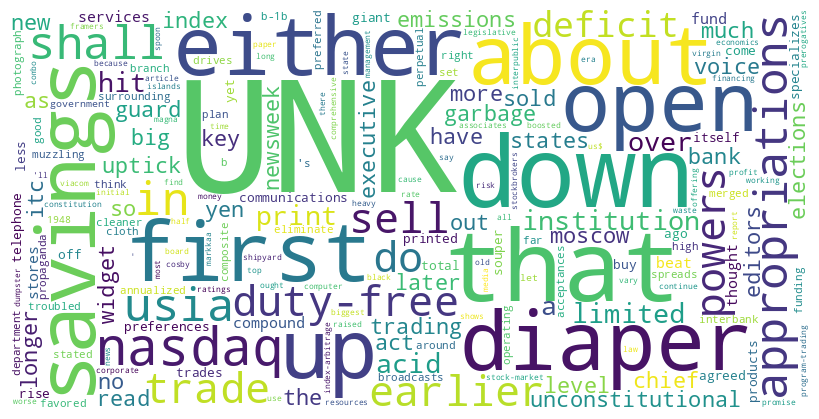

In [ ]:
from wordcloud import WordCloud
wordtags = ['{}'.format(word, _, _) for (word, true_tag, pred_tag), count in missclassified_words]
word_tag_frequency = Counter(wordtags)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_tag_frequency)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()